In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/HJ22_journal_review_analysis_edit.csv')
df

,Journal_Group,Journal,Year,Article_Title,doi,PMID,First_Author,Last_Author,Microbiome,Vivarium,Vivarium_Settings,Sample_Host,Sample_Type,Collection_Time,Time_note,Collection_Time_Reason
0,ASM,mSystems,2019,Pangenomic Approach To Understanding Microbial...,10.1128/mSystems.00281-18,NaN,Blaustein,Hartmann,Yes,No,NaN,environment,built environment,not provided,NaN,not provided
1,ASM,mSystems,2019,Emergent Subpopulation Behavior Uncovered with...,10.1128/mSystems.00230-18,NaN,Succurro,Ebenhöh,No,No,NaN,culture,bacterial culture,not provided,NaN,not provided
2,ASM,mSystems,2019,Integrated Omic Analyses Provide Evidence that...,10.1128/mSystems.00193-1,NaN,Camejo,Noguera,No,No,NaN,environment,bacterial culture,not provided,NaN,not provided
3,ASM,mSystems,2019,Rare Taxa Exhibit Disproportionate Cell-Level ...,10.1128/mSystems.00208-18,NaN,Jia,Lee,Yes,No,NaN,culture,mock community,not provided,NaN,not provided
4,ASM,mSystems,2019,Feed Restriction Modifies Intestinal Microbiot...,10.1128/mSystems.00261-18,NaN,Zebeli,Zebeli,Yes,No,NaN,chicken,"ileal, cecal",relative,before morning feeding,to see the weight difference
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,Cell,Cell,2019,Polygenic Prediction of Weight and Obesity Tra...,10.1016/j.cell.2019.03.028,NaN,Khera,Kathiresan,No,No,NaN,human,genetics,not provided,NaN,not provided
582,Cell,Cell,2019,Lipid-Associated Macrophages Control Metabolic...,10.1016/j.cell.2019.05.054,NaN,Jaitin,Amit,No,Yes,12:12,"mouse, human",white adipose tissue,not provided,NaN,not provided
583,Cell,Cell,2019,Fate Mapping via Ms4a3-Expression History Trac...,10.1016/j.cell.2019.08.009,NaN,Liu,Ginhoux,No,Yes,NaN,mouse,"blood, tissue",not provided,NaN,not provided
584,Cell,Cell,2019,B Cell Responses: Cell Interaction Dynamics an...,10.1016/j.cell.2019.03.016,NaN,Cyster,Allen,No,Yes,NaN,"mouse, human",blood,not provided,NaN,not provided


In [3]:
df.shape 

(586, 16)

In [4]:
df.Microbiome.unique()

array(['Yes', 'No'], dtype=object)

In [5]:
df.Microbiome.nunique()

2

In [6]:
df.Microbiome.value_counts()

Yes    317
No     269
Name: Microbiome, dtype: int64

In [7]:
df.Collection_Time = df.Collection_Time.str.rstrip()

In [8]:
df.Collection_Time.unique()

array(['not provided', 'relative', 'Yes'], dtype=object)

In [9]:
df.Collection_Time.value_counts()

not provided    548
relative         33
Yes               5
Name: Collection_Time, dtype: int64

<AxesSubplot:xlabel='Collection_Time', ylabel='count'>

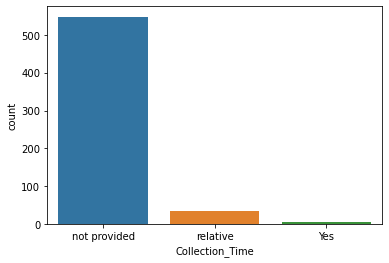

In [10]:
sns.countplot(data=df, x='Collection_Time')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'mSystems'),
  Text(1, 0, 'Science; Science Translational Medicine; Science Signaling; Science Advances; Science Immunology'),
  Text(2, 0, 'Nature Communications'),
  Text(3, 0, 'Nature'),
  Text(4, 0, 'Nature Microbiology'),
  Text(5, 0, 'Cell Reports'),
  Text(6, 0, 'Cell Metabolism'),
  Text(7, 0, 'Cell Host Microbe'),
  Text(8, 0, 'Cell')])

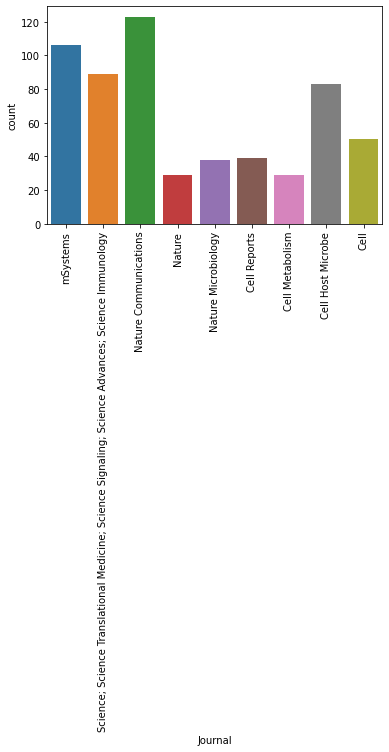

In [11]:
sns.countplot(data=df, x='Journal')
plt.xticks(rotation=90)

In [12]:
df2 = df.Microbiome.value_counts()
df2

Yes    317
No     269
Name: Microbiome, dtype: int64

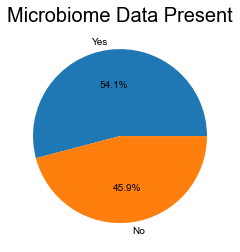

In [13]:
df2.plot.pie(autopct="%.1f%%")
plt.title("Microbiome Data Present", fontsize=20)
plt.ylabel('')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/Journals/JournalAnalysis_Microbiome.svg', dpi=150, bbox_inches='tight')

In [14]:
df3 = df.Collection_Time.value_counts()
df3

not provided    548
relative         33
Yes               5
Name: Collection_Time, dtype: int64

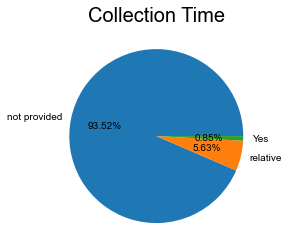

In [15]:
df3.plot.pie(autopct="%.2f%%")
plt.title("Collection Time", fontsize=20)
plt.ylabel('')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/Journals/JournalAnalysis_CollectionTime.svg', dpi=150, bbox_inches='tight')

In [16]:
df4 = df.Journal.value_counts()
df4

Nature Communications                                                                               123
mSystems                                                                                            106
Science; Science Translational Medicine; Science Signaling; Science Advances; Science Immunology     89
Cell Host Microbe                                                                                    83
Cell                                                                                                 50
Cell Reports                                                                                         39
Nature Microbiology                                                                                  38
Nature                                                                                               29
Cell Metabolism                                                                                      29
Name: Journal, dtype: int64

<AxesSubplot:ylabel='Journal'>

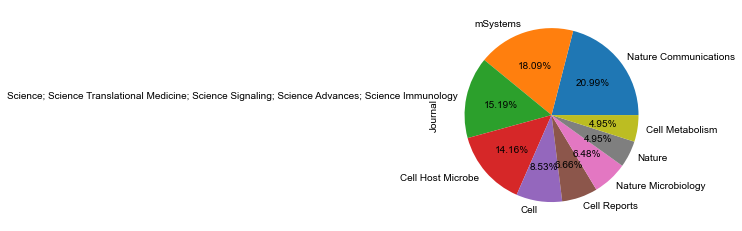

In [17]:
df4.plot.pie(autopct="%.2f%%")

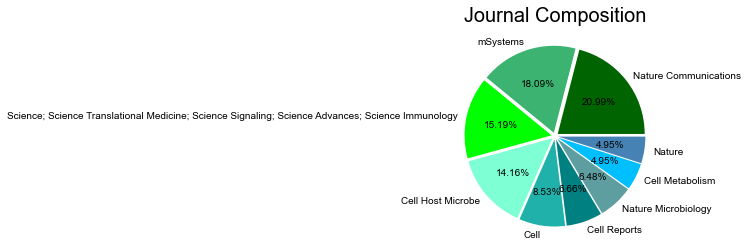

In [45]:
df4.plot.pie(autopct="%.2f%%", explode=[0.04]*9, colors=['darkgreen', 'mediumseagreen', 'lime', 'aquamarine', 'lightseagreen', 'teal', 'cadetblue', 'deepskyblue', 'steelblue'])
plt.title("Journal Composition", fontsize=20)
plt.ylabel('')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/Journals/JournalAnalysis_JournalPieplot.svg', dpi=150, bbox_inches='tight')

In [18]:
df5= df.Journal_Group.value_counts()
df5

Cell       201
Nature     190
ASM        106
Science     89
Name: Journal_Group, dtype: int64

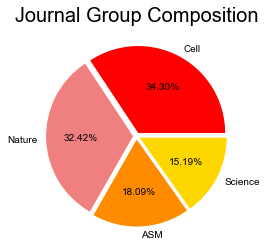

In [19]:
df5.plot.pie(autopct="%.2f%%", explode=[0.04]*4, colors=['red', 'lightcoral', 'darkorange', 'gold'])
plt.title("Journal Group Composition", fontsize=20)
plt.ylabel('')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
#plt.savefig('../figures/Journals/JournalAnalysis_JournalGroupComposition.svg', dpi=150, bbox_inches='tight')

# Contains Microbiome Data

In [20]:
Microdf= df[df['Microbiome']=='Yes']
Microdf

,Journal_Group,Journal,Year,Article_Title,doi,PMID,First_Author,Last_Author,Microbiome,Vivarium,Vivarium_Settings,Sample_Host,Sample_Type,Collection_Time,Time_note,Collection_Time_Reason
0,ASM,mSystems,2019,Pangenomic Approach To Understanding Microbial...,10.1128/mSystems.00281-18,NaN,Blaustein,Hartmann,Yes,No,NaN,environment,built environment,not provided,NaN,not provided
3,ASM,mSystems,2019,Rare Taxa Exhibit Disproportionate Cell-Level ...,10.1128/mSystems.00208-18,NaN,Jia,Lee,Yes,No,NaN,culture,mock community,not provided,NaN,not provided
4,ASM,mSystems,2019,Feed Restriction Modifies Intestinal Microbiot...,10.1128/mSystems.00261-18,NaN,Zebeli,Zebeli,Yes,No,NaN,chicken,"ileal, cecal",relative,before morning feeding,to see the weight difference
5,ASM,mSystems,2019,Alterations in Gut Glutamate Metabolism Associ...,10.1128/mSystems.00321-18,NaN,Wang,Zhou,Yes,No,NaN,human,feces,not provided,NaN,not provided
6,ASM,mSystems,2019,The Adenoids but Not the Palatine Tonsils Serv...,10.1128/mSystems.00169-18,NaN,Olsen,Jensen,Yes,No,NaN,human,oral,relative,during general anesthesia before surgery comme...,not provided
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559,Cell,Cell,2019,Commensal Microbiota Promote Lung Cancer Devel...,10.1016/j.cell.2018.12.040,NaN,Jin,Jacks,Yes,Yes,NaN,mouse,"fecal, lung tumors",not provided,NaN,not provided
564,Cell,Cell,2019,Marine DNA Viral Macro- and Microdiversity fro...,10.1016/j.cell.2019.03.040,NaN,Gregory,Sullivan,Yes,No,NaN,environment,ocean water,not provided,NaN,not provided
567,Cell,Cell,2019,Global Trends in Marine Plankton Diversity acr...,10.1016/j.cell.2019.10.008,NaN,Ibarbalz,Zinger,Yes,No,NaN,environment,seawater,not provided,NaN,not provided
572,Cell,Cell,2019,Genomes of Subaerial Zygnematophyceae Provide ...,10.1016/j.cell.2019.10.019,NaN,Cheng,Melkonian,Yes,No,NaN,culture,culture bacteria,not provided,NaN,not provided


In [21]:
df6 = Microdf.Collection_Time.value_counts()
df6

not provided    287
relative         29
Yes               1
Name: Collection_Time, dtype: int64

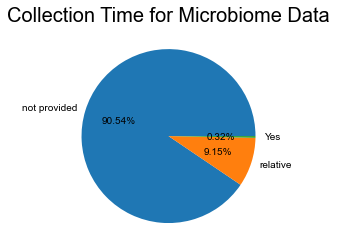

In [22]:
df6.plot.pie(autopct="%.2f%%")
plt.title("Collection Time for Microbiome Data", fontsize=20)
plt.ylabel('')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/Journals/JournalAnalysis_CollectionTime_MicrobiomeData.svg', dpi=150, bbox_inches='tight')

In [23]:
df7 = Microdf.Journal_Group.value_counts()
df7

Nature     116
ASM         84
Cell        81
Science     36
Name: Journal_Group, dtype: int64

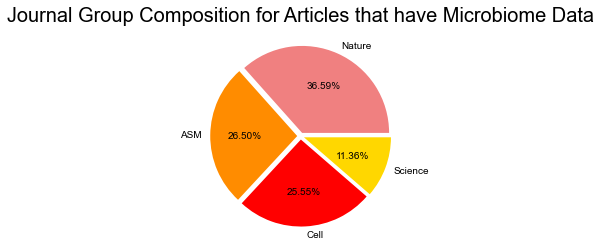

In [24]:
df7.plot.pie(autopct="%.2f%%", explode=[0.04]*4, colors=['lightcoral', 'darkorange', 'red', 'gold'])
plt.title("Journal Group Composition for Articles that have Microbiome Data", fontsize=20)
plt.ylabel('')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/Journals/JournalAnalysis_JournalGroupComposition_MicrobiomeData.svg', dpi=150, bbox_inches='tight')

In [25]:
df8 = Microdf.Journal.value_counts()
df8

mSystems                                                                                            84
Nature Communications                                                                               69
Cell Host Microbe                                                                                   37
Science; Science Translational Medicine; Science Signaling; Science Advances; Science Immunology    36
Nature Microbiology                                                                                 28
Nature                                                                                              19
Cell Reports                                                                                        19
Cell                                                                                                19
Cell Metabolism                                                                                      6
Name: Journal, dtype: int64

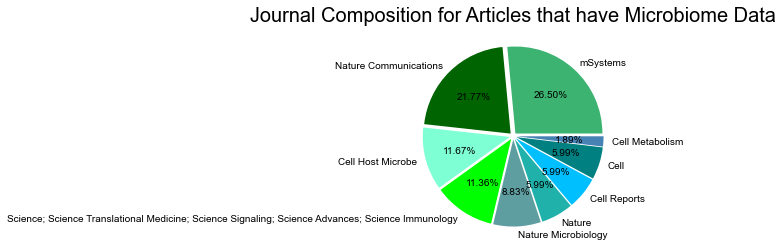

In [26]:
df8.plot.pie(autopct="%.2f%%", explode=[0.04]*9, colors=['mediumseagreen','darkgreen','aquamarine','lime','cadetblue','lightseagreen', 'deepskyblue','teal','steelblue'])
plt.title("Journal Composition for Articles that have Microbiome Data", fontsize=20)
plt.ylabel('')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['svg.fonttype'] = 'none'
plt.savefig('../figures/Journals/JournalAnalysis_JournalComposition_MicrobiomeData.svg', dpi=150, bbox_inches='tight')